In [1]:
import numpy as np
import pandas as pd

In [2]:
#reading dataset
dataset=pd.read_csv(r"C:\Users\Jyoti Ochani\Downloads\Machine learning\LPIII-ML Assignment 3\DTdataset.csv")

In [3]:
dataset

,ID,Age,Income,Gender,Marital Status,Buys
0,1,<21,High,Male,Single,No
1,2,<21,High,Male,Married,No
2,3,21-35,High,Male,Single,Yes
3,4,>35,Medium,Male,Single,Yes
4,5,>35,Low,Female,Single,Yes
5,6,>35,Low,Female,Married,No
6,7,21-35,Low,Female,Married,Yes
7,8,<21,Medium,Male,Single,No
8,9,<21,Low,Female,Married,Yes
9,10,>35,Medium,Female,Single,Yes


In [4]:
x=dataset.iloc[:,:-1]
y=dataset.iloc[:,5].values

In [5]:
x

,ID,Age,Income,Gender,Marital Status
0,1,<21,High,Male,Single
1,2,<21,High,Male,Married
2,3,21-35,High,Male,Single
3,4,>35,Medium,Male,Single
4,5,>35,Low,Female,Single
5,6,>35,Low,Female,Married
6,7,21-35,Low,Female,Married
7,8,<21,Medium,Male,Single
8,9,<21,Low,Female,Married
9,10,>35,Medium,Female,Single


In [6]:
y

array(['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'No'], dtype=object)

In [7]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [8]:
x=x.apply(LabelEncoder().fit_transform)

In [9]:
x

,ID,Age,Income,Gender,Marital Status
0,0,1,0,1,1
1,1,1,0,1,0
2,2,0,0,1,1
3,3,2,2,1,1
4,4,2,1,0,1
5,5,2,1,0,0
6,6,0,1,0,0
7,7,1,2,1,1
8,8,1,1,0,0
9,9,2,2,0,1


In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
decisiontree=DecisionTreeClassifier(criterion='entropy')
decisiontree.fit(x.iloc[:,1:5],y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [12]:
x_in=np.array([1,1,0,0])

In [13]:
y_pred=decisiontree.predict([x_in])

In [14]:
print(y_pred)

['Yes']


In [15]:
features=list(dataset.columns[1:-1])

In [16]:
print(features)

['Age', 'Income', 'Gender', 'Marital Status']


In [17]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [18]:
from sklearn.externals.six import StringIO
from IPython.display import Image

In [19]:
from sklearn.tree import export_graphviz

In [21]:
import pydotplus


In [22]:
dot_data=StringIO()

In [23]:
#exportgraphviz function convert decision tree classifier into dot file and pydotplus convert it into to png
export_graphviz(decisiontree,out_file=dot_data,feature_names=features,filled=True,rounded=True)


In [24]:
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())

In [25]:
graph.write_png('tree1.png')

True

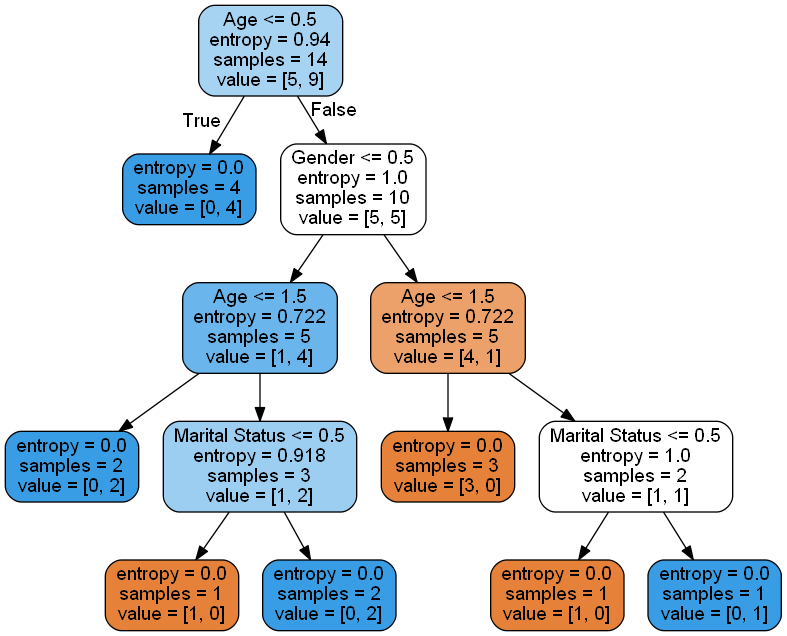

In [26]:
Image(graph.create_png())